In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.action import Action
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    # TFTT,
    # TTFT,
    # GenerousTFT,
    # GradualTFT,
    OmegaTFT,
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
])

In [3]:
class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        # self.elu = nn.ELU()

        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(2 * lookback, 100)
        self.layer2 = nn.Linear(100, 100)
        # self.layer3 = nn.Linear(32, 32)
        self.layer4 = nn.Linear(100, 2)

        nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        # nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer4.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    lookback = 8
    epsilon = 0.2

    def __init__(self):
        super().__init__()

        self._learning_rate = 0.05
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=250,
    noise=0,
    repetitions=1,
    epochs=10,
)

[02:22:12] Commencement of training.
[02:22:20] Completed epoch 1: 1.5361024218416557
[02:22:28] Completed epoch 2: 1.5265127493823663
[02:22:36] Completed epoch 3: 1.5245469611267057
[02:22:44] Completed epoch 4: 1.525525605460414
[02:22:52] Completed epoch 5: 1.5320512535991004
[02:23:01] Completed epoch 6: 1.5336068138966863
[02:23:10] Completed epoch 7: 1.5328278185048518
[02:23:20] Completed epoch 8: 1.5376281873455915
[02:23:31] Completed epoch 9: 1.5411737733670217
[02:23:39] Completed epoch 10: 1.5398871652610886


In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())
print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 29308, <Action.DEFECT: 1>: 3192}
{<Action.COOPERATE: 0>: 0.9017846153846154, <Action.DEFECT: 1>: 0.09821538461538462}


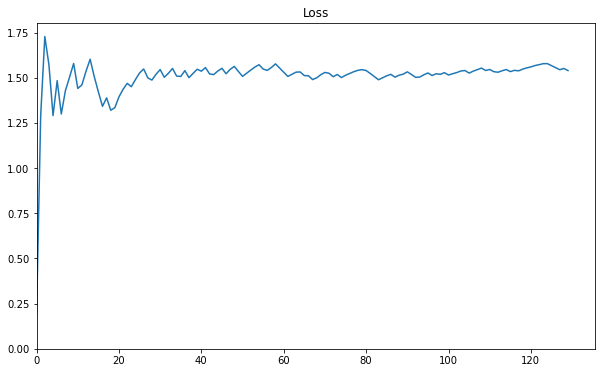

In [6]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

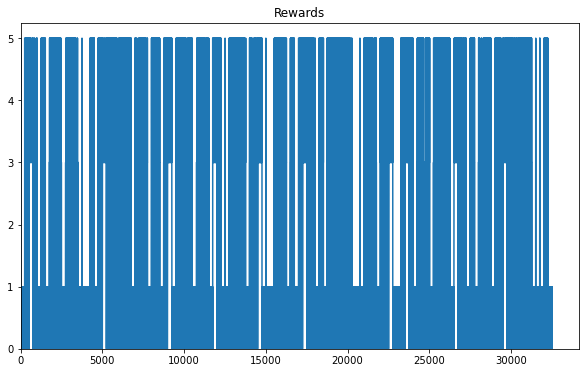

In [7]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

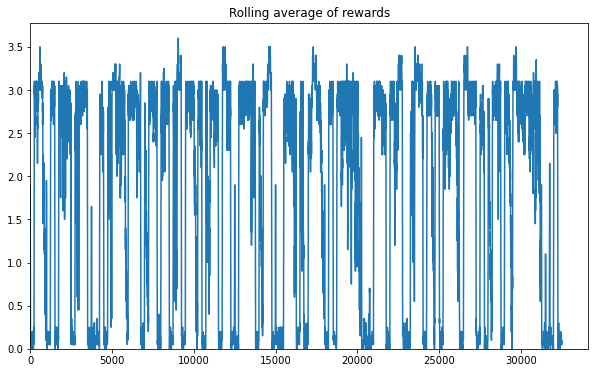

In [8]:
N = 20

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

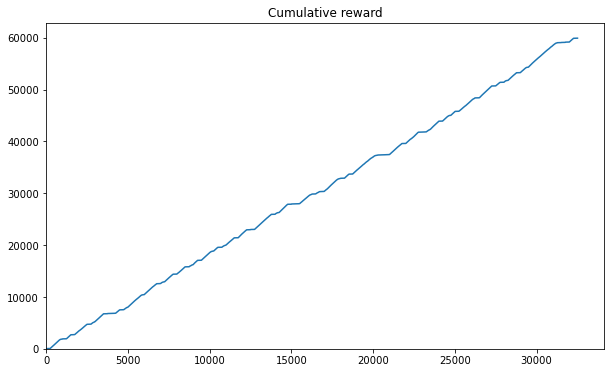

In [9]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

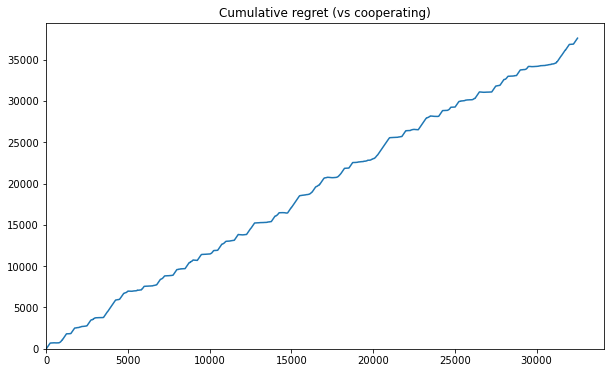

In [10]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

[{<Action.COOPERATE: 0>: 0.908, <Action.DEFECT: 1>: 0.092}, {<Action.COOPERATE: 0>: 0.9030769230769231, <Action.DEFECT: 1>: 0.09692307692307692}, {<Action.COOPERATE: 0>: 0.8953846153846153, <Action.DEFECT: 1>: 0.10461538461538461}, {<Action.COOPERATE: 0>: 0.9043076923076923, <Action.DEFECT: 1>: 0.09569230769230769}, {<Action.COOPERATE: 0>: 0.9070769230769231, <Action.DEFECT: 1>: 0.09292307692307693}, {<Action.COOPERATE: 0>: 0.8947692307692308, <Action.DEFECT: 1>: 0.10523076923076922}, {<Action.COOPERATE: 0>: 0.8993846153846153, <Action.DEFECT: 1>: 0.10061538461538462}, {<Action.COOPERATE: 0>: 0.8956923076923077, <Action.DEFECT: 1>: 0.10430769230769231}, {<Action.COOPERATE: 0>: 0.912923076923077, <Action.DEFECT: 1>: 0.08707692307692308}, {<Action.COOPERATE: 0>: 0.8972307692307693, <Action.DEFECT: 1>: 0.10276923076923077}]


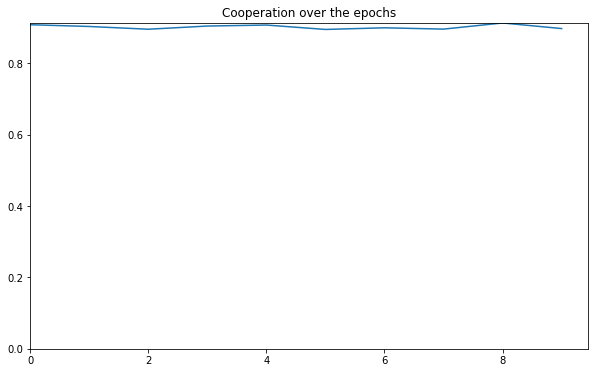

In [11]:
plt.title("Cooperation over the epochs")
print(env.normalised_epoch_counts)
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [12]:
# torch.save(agent._q_network.state_dict(), "model.pt")

In [13]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=2, bias=True)
)

In [14]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [01:13<00:00, 13.06matches/s]

Borufsen                       828                  7.65841             
SecondByBlackK83R              815                  8.582741999999998   
Pavlov                         802                  6.991107            
TitForTat                      795                  7.127603000000001   
SteinAndRapoport               792                  24.744970000000002  
OmegaTFT                       792                  8.287779            
Shubik                         789                  7.034634999999999   
White              789                  7.747794999999998   
Grofman                        781                  6.371298999999999   
TFTT                           780                  7.272333999999999   
GenerousTFT                    779                  6.3628919999999995  
GradualTFT                     777                  77.06163500000001   
Weiner                 777                  16.407735           
TidemanAndChieruzzi            770                  8.528653999999998  